[Text(0.5, 0.75, 'remainder__flipper_length_mm <= 206.5\ngini = 0.638\nsamples = 333\nvalue = [146, 68, 119]\nclass = Adelie'),
 Text(0.25, 0.25, 'gini = 0.429\nsamples = 208\nvalue = [144, 63, 1]\nclass = Adelie'),
 Text(0.75, 0.25, 'gini = 0.107\nsamples = 125\nvalue = [2, 5, 118]\nclass = Gentoo')]

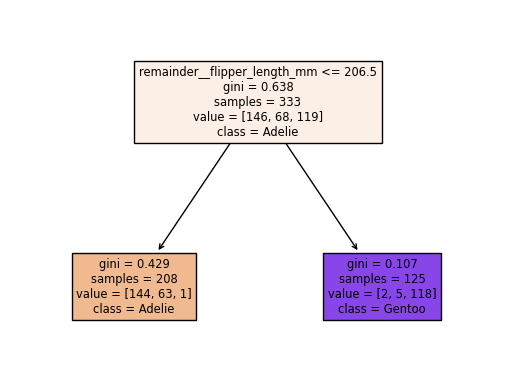

In [1]:
#### Interpretability vs. Complexity ####

# Importing necessary libraries
import pandas as pd
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Import data
data = pd.read_csv("penguins.csv")

# Model piece to handle categorical variables
ct = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(sparse_output = False), ["island", "sex"]),
  ],
  remainder = "passthrough"
)

X_train = data.drop(['species'], axis=1)
y_train = data['species'].astype('category').cat.codes


## Classification Tree (Small)
tree_pipeline = Pipeline(
  [("preprocessing", ct),
    ("tree", DecisionTreeClassifier(max_depth=1))]
).set_output(transform="pandas")

# Fit and plot tree
tree_fitted = tree_pipeline.fit(X_train, y_train)
tree.plot_tree(tree_fitted['tree'], feature_names = list(ct.transform(X_train).columns),
                filled = True, class_names = sorted(list(data['species'].unique()))
    )

[Text(0.6666666666666666, 0.9166666666666666, 'remainder__flipper_length_mm <= 206.5\ngini = 0.638\nsamples = 333\nvalue = [146, 68, 119]\nclass = Adelie'),
 Text(0.42857142857142855, 0.75, 'remainder__bill_length_mm <= 43.35\ngini = 0.429\nsamples = 208\nvalue = [144, 63, 1]\nclass = Adelie'),
 Text(0.23809523809523808, 0.5833333333333334, 'remainder__bill_length_mm <= 42.35\ngini = 0.067\nsamples = 145\nvalue = [140, 5, 0]\nclass = Adelie'),
 Text(0.14285714285714285, 0.4166666666666667, 'remainder__bill_depth_mm <= 16.65\ngini = 0.015\nsamples = 134\nvalue = [133, 1, 0]\nclass = Adelie'),
 Text(0.09523809523809523, 0.25, 'remainder__bill_length_mm <= 39.5\ngini = 0.165\nsamples = 11\nvalue = [10, 1, 0]\nclass = Adelie'),
 Text(0.047619047619047616, 0.08333333333333333, 'gini = 0.0\nsamples = 10\nvalue = [10, 0, 0]\nclass = Adelie'),
 Text(0.14285714285714285, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = Chinstrap'),
 Text(0.19047619047619047, 0.25, 'gini

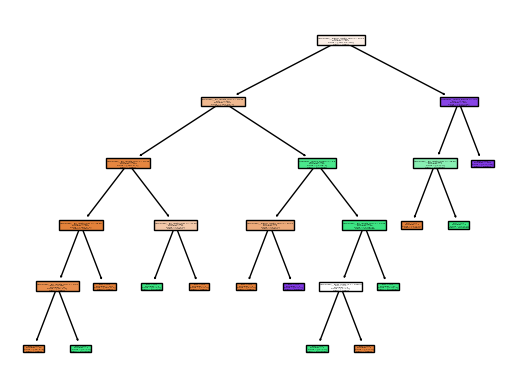

In [2]:
## Classification Tree (Medium)
tree_pipeline = Pipeline(
  [("preprocessing", ct),
    ("tree", DecisionTreeClassifier(max_depth=5))]
).set_output(transform="pandas")

# Fit and plot the tree
tree_fitted = tree_pipeline.fit(X_train, y_train)
tree.plot_tree(tree_fitted['tree'], feature_names = list(ct.transform(X_train).columns),
                filled = True, class_names = sorted(list(data['species'].unique()))
    )

[Text(0.65, 0.9166666666666666, 'remainder__flipper_length_mm <= 206.5\ngini = 0.638\nsamples = 333\nvalue = [146, 68, 119]\nclass = Adelie'),
 Text(0.45, 0.75, 'remainder__bill_length_mm <= 43.35\ngini = 0.429\nsamples = 208\nvalue = [144, 63, 1]\nclass = Adelie'),
 Text(0.25, 0.5833333333333334, 'remainder__bill_length_mm <= 42.35\ngini = 0.067\nsamples = 145\nvalue = [140, 5, 0]\nclass = Adelie'),
 Text(0.15, 0.4166666666666667, 'remainder__bill_depth_mm <= 16.65\ngini = 0.015\nsamples = 134\nvalue = [133, 1, 0]\nclass = Adelie'),
 Text(0.1, 0.25, 'remainder__bill_length_mm <= 39.5\ngini = 0.165\nsamples = 11\nvalue = [10, 1, 0]\nclass = Adelie'),
 Text(0.05, 0.08333333333333333, 'gini = 0.0\nsamples = 10\nvalue = [10, 0, 0]\nclass = Adelie'),
 Text(0.15, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = Chinstrap'),
 Text(0.2, 0.25, 'gini = 0.0\nsamples = 123\nvalue = [123, 0, 0]\nclass = Adelie'),
 Text(0.35, 0.4166666666666667, 'dummify__sex_male <= 0.5\ng

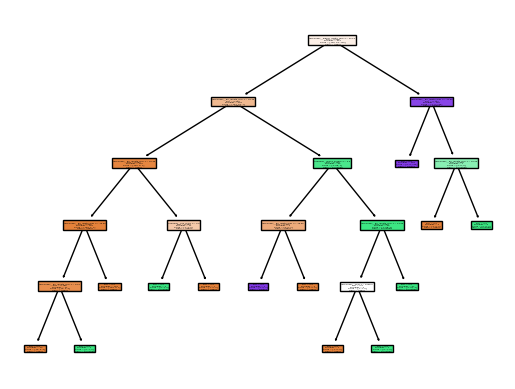

In [3]:
## Classification Tree (Big)
tree_pipeline = Pipeline(
  [("preprocessing", ct),
    ("tree", DecisionTreeClassifier(max_depth=7))]
).set_output(transform="pandas")

# Fit and plot the tree
tree_fitted = tree_pipeline.fit(X_train, y_train)
tree.plot_tree(tree_fitted['tree'], feature_names = list(ct.transform(X_train).columns),
                filled = True, class_names = sorted(list(data['species'].unique()))
    )